Install reguired modules

In [1]:
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

Import the spam dataset and print the first six rows.

In [3]:
df = pd.read_csv('spam_dataset.csv')

df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


Visualize the univariate distribution of each of the variables in the previous question

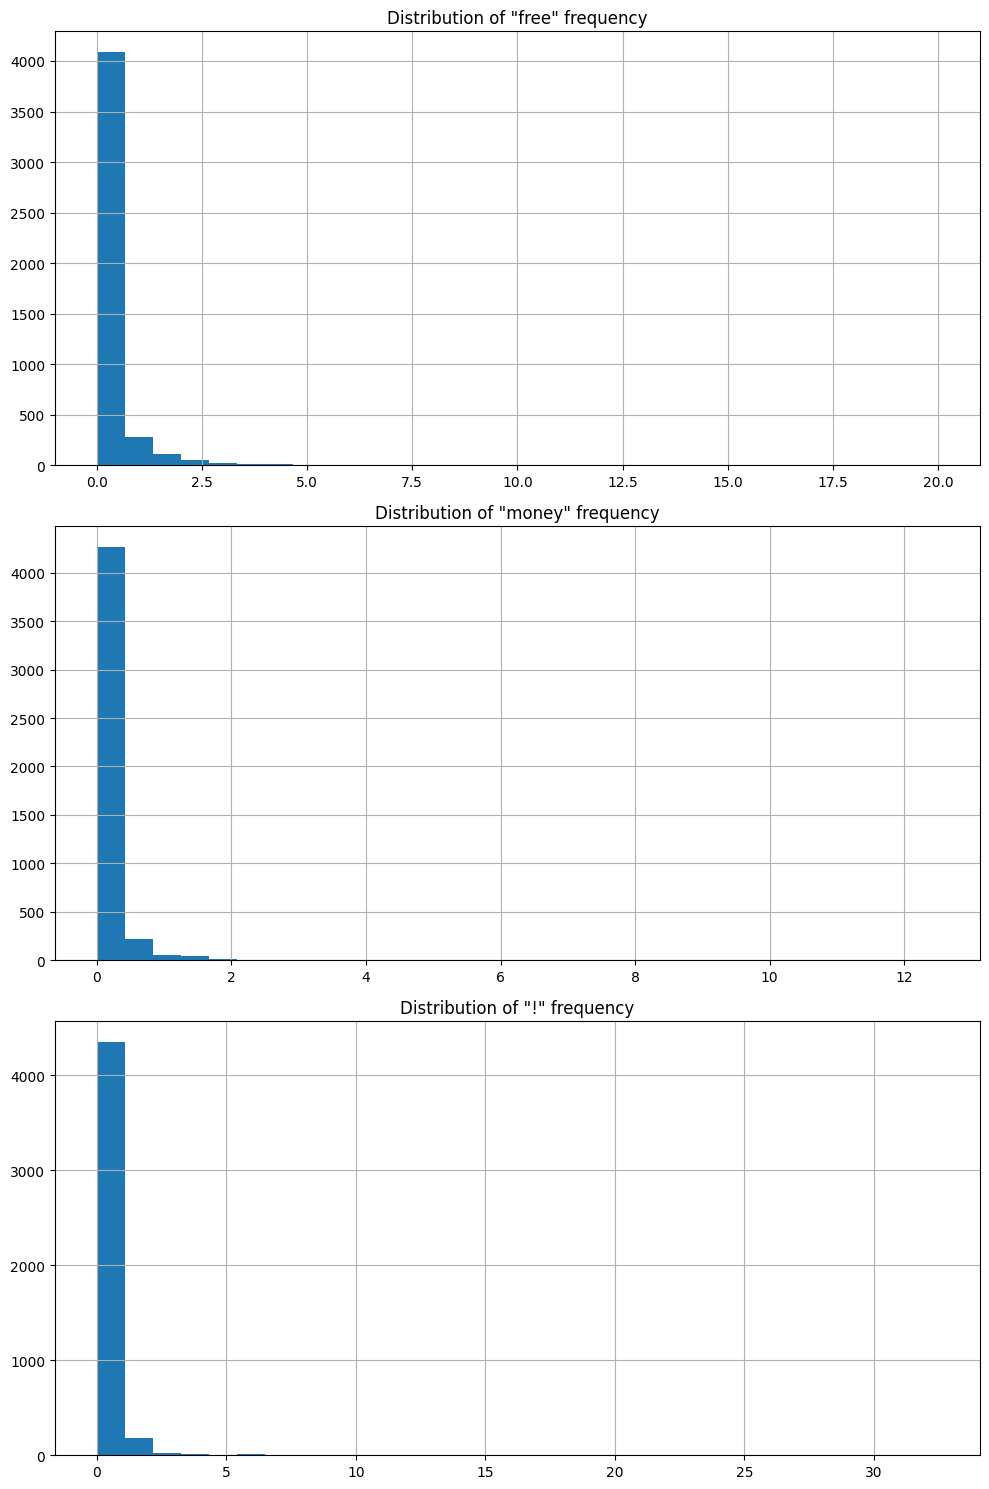

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

df['word_freq_free:'].hist(ax=axs[0], bins=30)
axs[0].set_title('Distribution of "free" frequency')

df['word_freq_money:'].hist(ax=axs[1], bins=30)
axs[1].set_title('Distribution of "money" frequency')

df['char_freq_!:'].hist(ax=axs[2], bins=30)
axs[2].set_title('Distribution of "!" frequency')

plt.tight_layout()
plt.show()

Build a model with the three variables in the dataset that you think will be good predictors of "spam". Run the model and evaluate prediction error using k-fold cross-validation




#prepare data

In [5]:
# Prepare the data
X = df[['word_freq_free:', 'word_freq_money:', 'char_freq_!:']]
y = df['spam']

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Logistic Regression Model

Cross-validation scores: [0.80673181 0.80108696 0.8        0.81847826 0.81304348]
Mean CV score: 0.8079 (+/- 0.0141)


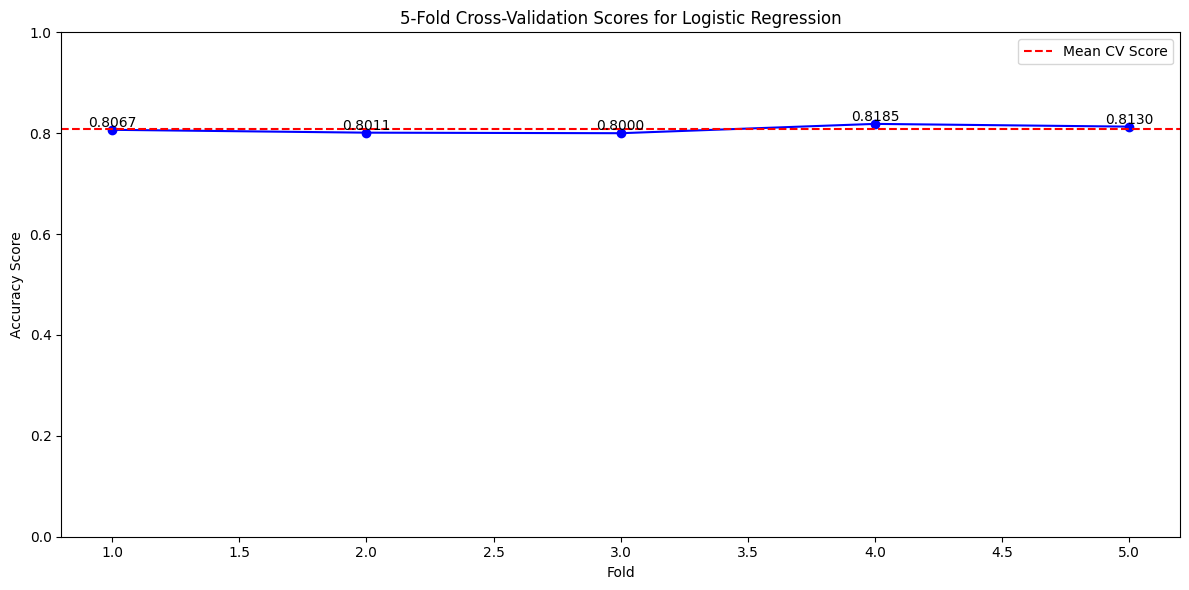

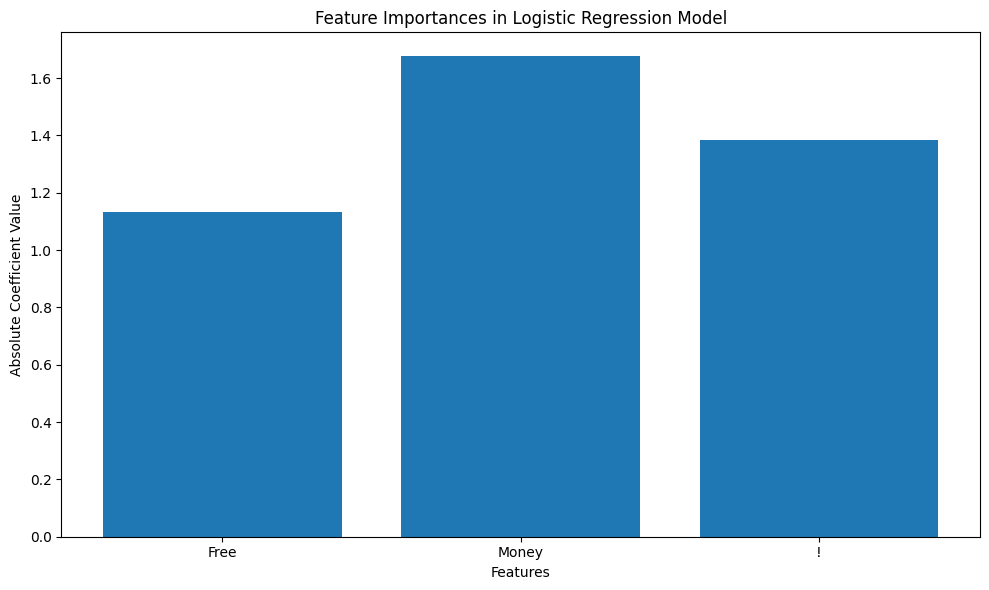

In [6]:


# Create and train the model
model = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_normalized, y, cv=kf)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize the 5-fold process
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), cv_scores, 'bo-')
plt.title('5-Fold Cross-Validation Scores for Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, score in enumerate(cv_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom')

plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label='Mean CV Score')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize feature importances
model.fit(X_normalized, y)  # Fit the model on all data
feature_importance = abs(model.coef_[0])
feature_names = ['Free', 'Money', '!']



plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

k nearest neighbors

In [7]:
# Find best parameters for KNN
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_normalized, y)
best_knn = grid_search.best_estimator_

# Perform 5-fold cross-validation with the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_knn, X_normalized, y, cv=kf)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



# Calculate feature importances using permutation importance
# result = permutation_importance(best_knn, X_normalized, y, n_repeats=10, random_state=42)
# result


Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Cross-validation scores: [0.49511401 0.45       0.46195652 0.46304348 0.44891304]
Mean CV score: 0.4638 (+/- 0.0334)


Naive Bayes 

In [8]:

# Use Min-Max scaling to ensure no negative values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Naive Bayes classifier (MultinomialNB for word frequencies)
nb_model = MultinomialNB()

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and evaluate model using accuracy as the scoring metric
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring='accuracy')

# Output the results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of Accuracy: {np.std(cv_scores):.2f}')

Cross-Validation Scores: [0.57654723 0.60652174 0.61521739 0.62065217 0.60978261]
Average Cross-Validation Accuracy: 0.61
Standard Deviation of Accuracy: 0.02


Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the Decision Tree classifier with parameters
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and evaluate model using accuracy as the scoring metric
cv_scores = cross_val_score(dt_model, X_normalized, y, cv=kf, scoring='accuracy')

# Output the results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.5f}')
print(f'Standard Deviation of Accuracy: {np.std(cv_scores):.5f}')

Cross-Validation Scores: [0.84581976 0.84673913 0.82934783 0.83695652 0.85108696]
Average Cross-Validation Accuracy: 0.84199
Standard Deviation of Accuracy: 0.00781


Rerun all 4 models with 3 additional variables that you think will help the prediction accuracy. Did this cause the performance to improve over your previous models ?

Prepare data with 3  extra variables

In [10]:
# Prepare the data
X = df[['word_freq_free:', 'word_freq_money:', 'char_freq_!:','word_freq_cs:', 'word_freq_george:', 'word_freq_hp:']]
y = df['spam']

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Logistic Regression

Cross-validation scores: [0.82953312 0.83695652 0.82391304 0.8326087  0.8423913 ]
Mean CV score: 0.8331 (+/- 0.0126)


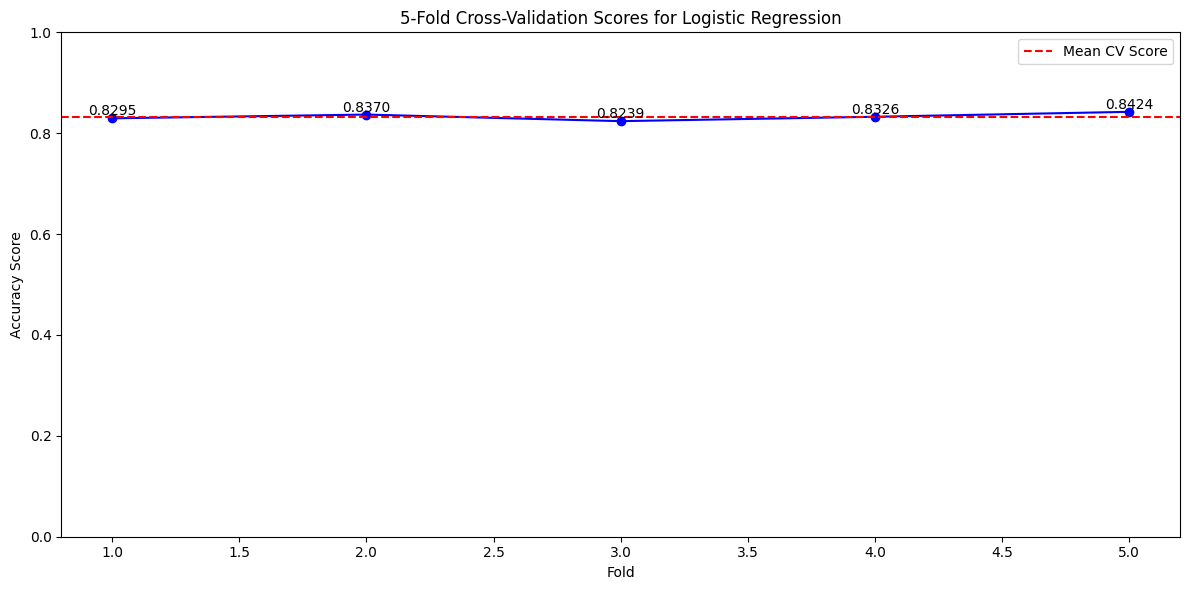

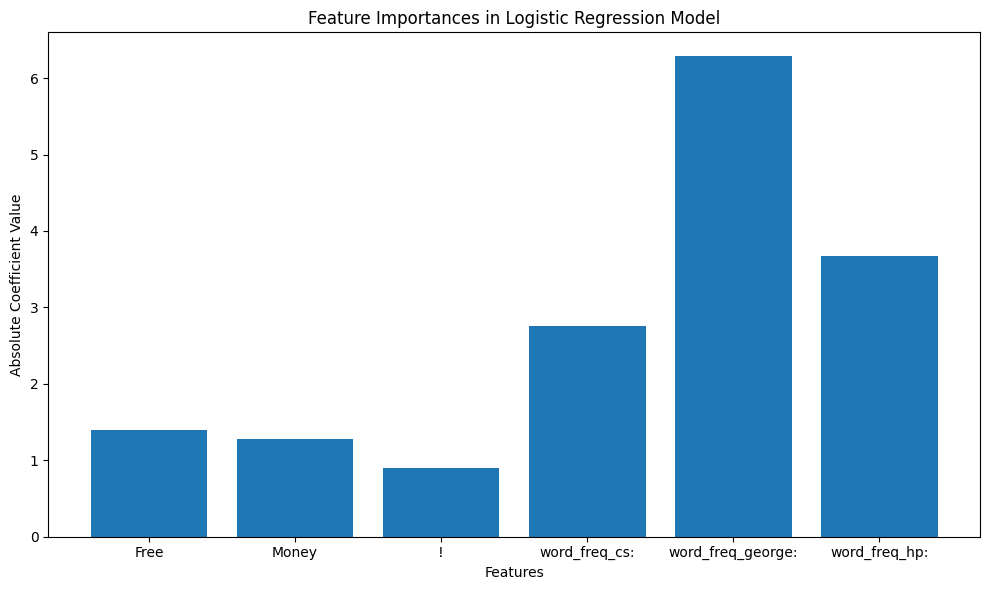

In [11]:


# Create and train the model
model = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_normalized, y, cv=kf)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize the 5-fold process
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), cv_scores, 'bo-')
plt.title('5-Fold Cross-Validation Scores for Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, score in enumerate(cv_scores):
    plt.text(i+1, score, f'{score:.4f}', ha='center', va='bottom')

plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label='Mean CV Score')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize feature importances
model.fit(X_normalized, y)  # Fit the model on all data
feature_importance = abs(model.coef_[0])
feature_names = ['Free', 'Money', '!','word_freq_cs:', 'word_freq_george:', 'word_freq_hp:']



plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('Feature Importances in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

k nearest neighbors

In [12]:
# Find best parameters for KNN
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_normalized, y)
best_knn = grid_search.best_estimator_

# Perform 5-fold cross-validation with the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_knn, X_normalized, y, cv=kf)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



# Calculate feature importances using permutation importance
# result = permutation_importance(best_knn, X_normalized, y, n_repeats=10, random_state=42)
# result


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Cross-validation scores: [0.73181325 0.71086957 0.71086957 0.72282609 0.73913043]
Mean CV score: 0.7231 (+/- 0.0225)


Naive Bayes 

In [13]:

# Use Min-Max scaling to ensure no negative values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Naive Bayes classifier (MultinomialNB for word frequencies)
nb_model = MultinomialNB()

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and evaluate model using accuracy as the scoring metric
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=kf, scoring='accuracy')

# Output the results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of Accuracy: {np.std(cv_scores):.2f}')

Cross-Validation Scores: [0.58414767 0.625      0.62391304 0.63043478 0.62934783]
Average Cross-Validation Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the Decision Tree classifier with parameters
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation and evaluate model using accuracy as the scoring metric
cv_scores = cross_val_score(dt_model, X_normalized, y, cv=kf, scoring='accuracy')

# Output the results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.5f}')
print(f'Standard Deviation of Accuracy: {np.std(cv_scores):.5f}')

Cross-Validation Scores: [0.86536374 0.86413043 0.84456522 0.85108696 0.87173913]
Average Cross-Validation Accuracy: 0.85938
Standard Deviation of Accuracy: 0.00999
